In [1]:
%pylab inline


font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


In [2]:
def read_data_sag(filename):
    data = np.loadtxt(filename)
    t = data[:,0]
    x_ngc = data[:,1]
    y_ngc = data[:,2]
    z_ngc = data[:,3]

    vx_ngc = data[:,4]
    vy_ngc = data[:,5]
    vz_ngc = data[:,6]


    x_sag = data[:,7]
    y_sag = data[:,8]
    z_sag = data[:,9]

    vx_sag = data[:,10]
    vy_sag = data[:,11]
    vz_sag = data[:,12]

    r_ngc = np.array([x_ngc, y_ngc, z_ngc]).T
    v_ngc = np.array([vx_ngc, vy_ngc, vz_ngc]).T

    r_sag = np.array([x_sag, y_sag, z_sag]).T
    v_sag = np.array([vx_sag, vy_sag, vz_sag]).T
    
    return t, r_ngc,  v_ngc, r_sag, v_sag


In [28]:
t, r_ngc, v_ngc, r_sag, v_sag = read_data_sag('MWlSgr_ICs0')


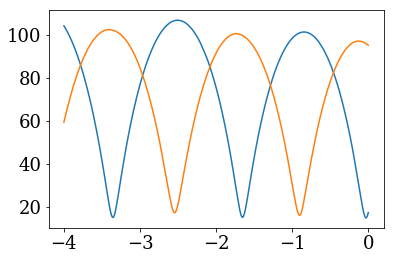

In [29]:
plot(t,(r_sag[:,0]**2+r_sag[:,1]**2+r_sag[:,2]**2)**0.5)
plot(t, (r_ngc[:,0]**2+r_ngc[:,1]**2+r_ngc[:,2]**2)**0.5)


In [30]:
def distance(xyzMW, xyzSat):
    """
    Disatnce between two points
    """
    
    D = np.sqrt((xyzSat[0]-xyzMW[0])**2 + (xyzSat[1]-xyzMW[1])**2 + (xyzSat[2]-xyzMW[2])**2)
                  
    return D
    

In [31]:
len(r_ngc[0])

3

In [34]:
argmin?

In [102]:
dist_min = np.zeros(len(r_ngc))
t_ngc = np.zeros(len(r_ngc))
t_sag = np.zeros(len(r_sag))

k=0
for i in range(len(r_ngc)):
    dist_t = np.ones(len(r_sag))*1000
    for j in range(len(r_sag)):
        if np.abs(t[i])<=np.abs(t[j]):
            dist_t[j] = distance(r_ngc[i], r_sag[j])
    dist_min[i] = dist_t[(argmin(dist_t))]
    t_sag[i] = t[(argmin(dist_t))]
    t_ngc[i] = t[i]

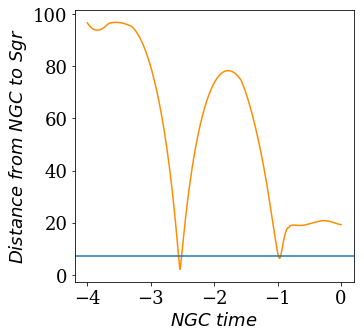

In [110]:
plt.figure(figsize=(5,5))
#plt.subplot(1, 2, 1)
plt.plot(t_ngc, dist_min, c='darkorange')
plt.axhline(7.14)
plt.xlabel('$NGC\ time$')
plt.ylabel('$Distance\ from\ NGC\ to\ Sgr$')



In [131]:
np.float32(t_sag)

array([-1.20299995, -1.20299995, -1.20299995, ..., -3.99699998,
       -3.99799991, -3.99900007], dtype=float32)

In [175]:
#min_dist = (argmin(dist_min))
r_t = 8
min_dist = where(dist_min<= r_t)
## Min distance , this have to ve replaces by dist<r_t
#print(dist_min[min_dist])

# NGC time at which the distance if < r_t
#print('Time at which NGC cross through Sag orbit:\n', t_ngc[min_dist])
# Sag time at which the distance if < r_t
print('Time of the orbit of Sag at which NGC cross:\n', t_sag[min_dist])

index = np.zeros(len(t_sag[min_dist]), dtype='int')
for i in range(len(t_sag[min_dist])):
    index[i] = where(t==t_sag[min_dist][i])[0][0]
#print(t[index])



print('postion of NGC2419 at t_ngc of maximum approach: \n', r_ngc[min_dist])
print('postion of Sgr at t_sag of maximum approach: \n', r_sag[index])

Time of the orbit of Sag at which NGC cross:
 [-1.715 -1.716 -1.717 -1.717 -1.718 -1.719 -1.72  -1.721 -1.722 -1.723
 -1.723 -1.725 -1.725 -1.726 -1.727 -1.728 -1.729 -1.729 -1.731 -1.731
 -1.732 -1.733 -1.734 -1.735 -1.735 -1.737 -1.737 -1.738 -1.739 -1.739
 -1.741 -1.741 -1.742 -1.743 -1.744 -1.745 -1.745 -1.746 -1.747 -1.748
 -1.749 -1.749 -1.75  -1.751 -1.752 -1.753 -1.753 -1.754 -1.755 -1.755
 -1.757 -3.353 -3.353 -3.354 -3.354 -3.355 -3.355 -3.356 -3.356 -3.357
 -3.357 -3.358 -3.358 -3.359 -3.359 -3.359 -3.36  -3.36  -3.361 -3.361
 -3.362 -3.362 -3.363 -3.363 -3.364 -3.364 -3.365 -3.365 -3.366 -3.366
 -3.367 -3.367 -3.368 -3.368 -3.369 -3.369 -3.37  -3.37  -3.371 -3.371
 -3.371 -3.372 -3.372 -3.373 -3.373 -3.374 -3.374 -3.375 -3.375 -3.376
 -3.376 -3.377 -3.377 -3.378 -3.378 -3.379]
[-1.715 -1.716 -1.717 -1.717 -1.718 -1.719 -1.72  -1.721 -1.722 -1.723
 -1.723 -1.725 -1.725 -1.726 -1.727 -1.728 -1.729 -1.729 -1.731 -1.731
 -1.732 -1.733 -1.734 -1.735 -1.735 -1.737 -1.737 -1.738 -

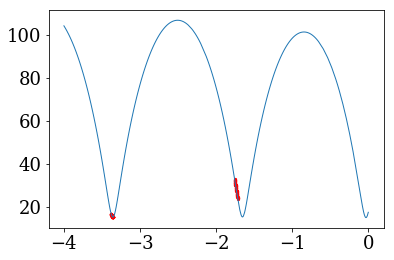

In [190]:
plot(t,(r_sag[:,0]**2+r_sag[:,1]**2+r_sag[:,2]**2)**0.5, lw=1)

scatter(t[index], np.sqrt(r_sag[index][:,0]**2 + r_sag[index][:,1]**2 + r_sag[index][:,2]**2)
       ,c = 'r', s=5)

savefig('NGC_passages.pdf', dpi=300, bbox_inches='tight')

In [181]:
r_sag[index][:,0]

array([ 23.396734,  23.543204,  23.743544,  23.743544,  23.887687,
        24.084667,  24.22654 ,  24.420243,  24.559906,  24.750409,
        24.750409,  25.075299,  25.075299,  25.210707,  25.395039,
        25.528399,  25.709753,  25.709753,  26.019559,  26.019559,
        26.148973,  26.324573,  26.452084,  26.624906,  26.624906,
        26.920663,  26.920663,  27.044503,  27.211949,  27.211949,
        27.498861,  27.498861,  27.619199,  27.781498,  27.900144,
        28.059951,  28.059951,  28.176943,  28.33431 ,  28.449684,
        28.604661,  28.604661,  28.718454,  28.871089,  28.983334,
        29.133674,  29.133674,  29.244403,  29.392493,  29.392493,
        29.647624, -14.852615, -14.852615, -14.805894, -14.805894,
       -14.689897, -14.689897, -14.640349, -14.640349, -14.517465,
       -14.517465, -14.465148, -14.465148, -14.335544, -14.335544,
       -14.335544, -14.280526, -14.280526, -14.144389, -14.144389,
       -14.086745, -14.086745, -13.94428 , -13.94428 , -13.884

In [154]:
t_sag[min_dist][0]

-1.7150000000000001